In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from itertools import cycle
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [170]:
data=pd.read_csv('/Users/vishnuvardhanvankayalapati/Desktop/Stock Prediction/Blackrock/data/BLK.csv')

In [171]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-10-01,14.000000,14.250000,14.000000,14.125000,9.086963,3162400
1,1999-10-04,14.125000,14.125000,14.000000,14.000000,9.006545,533400
2,1999-10-05,14.000000,14.125000,14.000000,14.125000,9.086963,270600
3,1999-10-06,14.125000,14.875000,14.125000,14.875000,9.569453,205400
4,1999-10-07,14.875000,14.875000,14.062500,14.125000,9.086963,214200
...,...,...,...,...,...,...,...
5870,2023-01-31,750.000000,759.710022,746.090027,759.210022,759.210022,572000
5871,2023-02-01,753.719971,768.299988,744.390015,762.630005,762.630005,702200
5872,2023-02-02,763.900024,781.770020,763.140015,770.729980,770.729980,1101700
5873,2023-02-03,750.000000,769.809998,747.989990,757.159973,757.159973,1201800


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5875 non-null   object 
 1   Open       5875 non-null   float64
 2   High       5875 non-null   float64
 3   Low        5875 non-null   float64
 4   Close      5875 non-null   float64
 5   Adj Close  5875 non-null   float64
 6   Volume     5875 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 321.4+ KB


In [173]:
corr=data.corr()

In [174]:
corr

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999865,0.999863,0.999727,0.996300,0.258540
High,0.999865,1.000000,0.999795,0.999870,0.996501,0.261851
Low,0.999863,0.999795,1.000000,0.999858,0.996377,0.255958
Close,0.999727,0.999870,0.999858,1.000000,0.996571,0.259521
Adj Close,0.996300,0.996501,0.996377,0.996571,1.000000,0.243892
Volume,0.258540,0.261851,0.255958,0.259521,0.243892,1.000000


<AxesSubplot:>

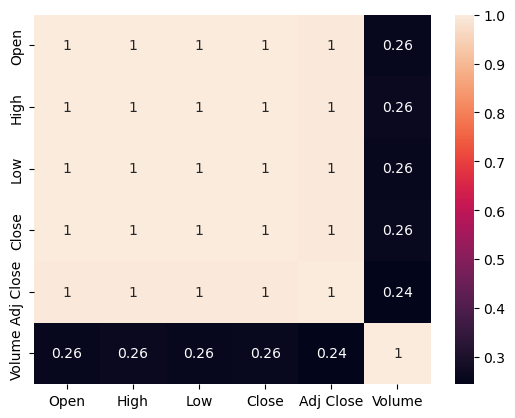

In [175]:
sns.heatmap(corr,annot=True)

***Performing Linear Regression:***

In [176]:
X=np.array(data['High'])
y=np.array(data['Close'])

In [177]:
X=X.reshape(-1,1)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [179]:
model=LinearRegression()

In [180]:
model.fit(X_train,y_train)

LinearRegression()

In [181]:
y_pred=model.predict(X_test)

In [182]:
days=np.arange(1,16,1)
days

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [183]:
dates=pd.date_range(start='today',periods=15)

In [184]:
import datetime

In [185]:
X_new = np.array([[(date - datetime.datetime(2023,2,8)).days] for date in dates])

In [186]:
(((dates - datetime.datetime(2023,2,8))))

TimedeltaIndex([ '1 days 14:37:14.914974',  '2 days 14:37:14.914974',
                 '3 days 14:37:14.914974',  '4 days 14:37:14.914974',
                 '5 days 14:37:14.914974',  '6 days 14:37:14.914974',
                 '7 days 14:37:14.914974',  '8 days 14:37:14.914974',
                 '9 days 14:37:14.914974', '10 days 14:37:14.914974',
                '11 days 14:37:14.914974', '12 days 14:37:14.914974',
                '13 days 14:37:14.914974', '14 days 14:37:14.914974',
                '15 days 14:37:14.914974'],
               dtype='timedelta64[ns]', freq=None)

In [187]:
X_new

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15]])

In [188]:
y_pred1 = model.predict(X_new)

In [189]:
y_pred1

array([ 0.64275717,  1.6335821 ,  2.62440703,  3.61523197,  4.6060569 ,
        5.59688183,  6.58770677,  7.5785317 ,  8.56935663,  9.56018157,
       10.5510065 , 11.54183143, 12.53265637, 13.5234813 , 14.51430624])

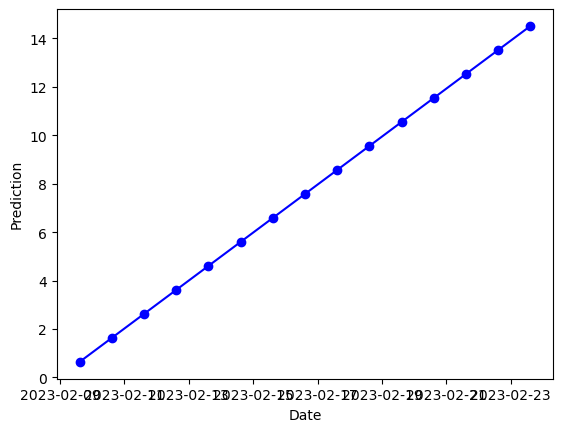

In [190]:
plt.plot(dates, y_pred1, '-o', color='blue')
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.show()

In [191]:
mse=mean_squared_error(y_test,y_pred)
mse

15.75663155838466

In [192]:
rmse=np.sqrt(mse)
rmse

3.969462376491892

In [193]:
mae= mean_absolute_error(y_test,y_pred)
mae

2.2460729695135964

In [194]:
#prefectfit if r2=1;
r2=r2_score(y_test,y_pred)
r2

0.9996473215760353

In [195]:
results = {'Metric': ['MSE', 'RMSE', 'MAE', 'R-squared'],
           'Value': [mse, rmse, mae, r2]}
results_accuracies=pd.DataFrame(results)
results_accuracies


,Metric,Value
0,MSE,15.756632
1,RMSE,3.969462
2,MAE,2.246073
3,R-squared,0.999647


***Applying Support vector Machine:***

In [196]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [197]:
svm_model=svm.SVC(kernel='linear',C=1,random_state=0)
svm_model=(X_train,y_train)

In [198]:
y_pred=model.predict(X_test)

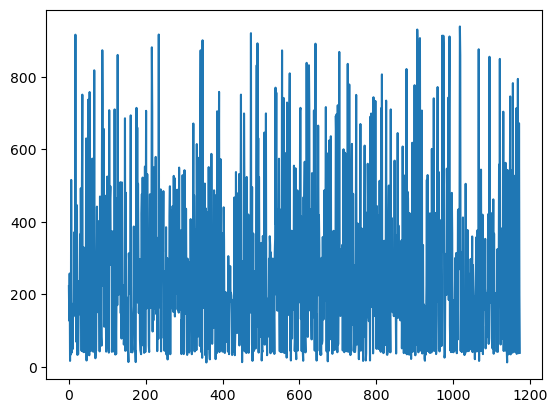

In [199]:
plt.plot(y_pred)

***Analysis for 2000***

In [200]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
y_2000 = data.loc[(data['Date'] >= '2000-01-01')
                     & (data['Date'] < '2000-12-31')]

y_2000

,Date,Open,High,Low,Close,Adj Close,Volume
64,2000-01-03,17.4375,17.5000,16.6250,16.6250,10.695271,64600
65,2000-01-04,16.6250,16.6250,15.6250,15.8750,10.212778,81900
66,2000-01-05,15.7500,15.7500,15.0000,15.7500,10.132366,38100
67,2000-01-06,15.7500,16.2500,15.7500,16.0000,10.293197,41200
68,2000-01-07,15.8750,16.2500,15.7500,15.8750,10.212778,34700
...,...,...,...,...,...,...,...
311,2000-12-22,40.1250,40.1250,37.6250,38.5000,24.767996,101000
312,2000-12-26,38.4375,39.3125,38.3750,39.3125,25.290705,31700
313,2000-12-27,39.3750,41.1250,38.5625,41.1250,26.456730,82800
314,2000-12-28,41.1250,44.2500,41.1250,43.3750,27.904213,57300


In [201]:
monthwise= y_2000.groupby(y_2000['Date'].dt.strftime('%B'))[['Open','High','Low','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise

,Open,High,Low,Close
Date,,,,
January,17.015625,17.306250,16.725000,16.971875
February,18.518750,18.759375,18.425000,18.612500
March,22.323370,22.608696,22.054348,22.312500
April,22.542763,23.067434,22.322368,22.858553
May,24.642045,24.980114,24.326705,24.602273
June,28.062500,28.913352,27.519886,28.289773
July,32.356250,32.987500,32.018750,32.600000
August,34.418478,34.953804,34.100543,34.709239
September,37.712500,38.159375,36.953125,37.365625


In [202]:
fig = go.Figure()

fig.add_trace(go.Line(
    x=monthwise.index,
    y=monthwise['Open'],
    name='BlackRock Stock Open Price',
    marker_color='Red'
))
fig.add_trace(go.Line(
    x=monthwise.index,
    y=monthwise['High'],
    name='BlackRock Stock Close Price',
    marker_color='Blue'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between BlackRock open and high price')
fig.show()

/Users/vishnuvardhanvankayalapati/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [203]:
y_2000.groupby(y_2000['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2000.groupby(data['Date'].dt.strftime('%B'))['Open'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2000.groupby(y_2000['Date'].dt.strftime('%B'))['High'].max()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Line(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Blackrock Stock open Price',
    marker_color='blue'
))
fig.add_trace(go.Line(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Blackrock Stock high Price',
    marker_color='red'
))
fig.update_layout(barmode='group',title=' Monthwise Open and High Blackrock Stock Price')
fig.show()


/Users/vishnuvardhanvankayalapati/opt/anaconda3/lib/python3.9/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [204]:
names = cycle(['Stock Open Price','Stock High Price','Stock Low Price','Stock Close Price'])

fig = px.line(y_2000, x=y_2000.Date, y=[y_2000['Open'], y_2000['High'], 
                                          y_2000['Low'], y_2000['Close']],
             labels={'Date': 'Date','value':'Blackrock value'})
fig.update_layout(title_text='Blackrock Stock analysis chart', font_size=15, font_color='black',legend_title_text='Blackrock Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [206]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-10-01,14.000000,14.250000,14.000000,14.125000,9.086963,3162400
1,1999-10-04,14.125000,14.125000,14.000000,14.000000,9.006545,533400
2,1999-10-05,14.000000,14.125000,14.000000,14.125000,9.086963,270600
3,1999-10-06,14.125000,14.875000,14.125000,14.875000,9.569453,205400
4,1999-10-07,14.875000,14.875000,14.062500,14.125000,9.086963,214200
...,...,...,...,...,...,...,...
5870,2023-01-31,750.000000,759.710022,746.090027,759.210022,759.210022,572000
5871,2023-02-01,753.719971,768.299988,744.390015,762.630005,762.630005,702200
5872,2023-02-02,763.900024,781.770020,763.140015,770.729980,770.729980,1101700
5873,2023-02-03,750.000000,769.809998,747.989990,757.159973,757.159973,1201800


***Making separate dataframe***

In [209]:
closeddf=data[['Date','Close']]
print("shape of close dataframe:",closeddf.shape)

shape of close dataframe: (5875, 2)


In [216]:
#plotting line graph
fig = px.line(closeddf, x=closeddf.Date, y=closeddf.Close,labels={'Date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [219]:
#normalizing value between 0 and 1
close_stock = closeddf.copy()
del closeddf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closeddf=scaler.fit_transform(np.array(closeddf).reshape(-1,1))
print(closeddf.shape)

(5875, 1)


In [220]:
#Splitting data
training_size=int(len(closeddf)*0.70)
test_size=len(closeddf)-training_size
train_data,test_data=closeddf[0:training_size,:],closeddf[training_size:len(closeddf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (4112, 1)
test_data:  (1763, 1)


In [221]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


In [222]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (4096, 15)
y_train:  (4096,)
X_test:  (1747, 15)
y_test (1747,)


In [224]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [225]:
train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (4096, 1)
Test data prediction: (1747, 1)


In [226]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [227]:
import math

In [228]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))


Train data RMSE:  1.4062224308201288
Train data MSE:  1.977461524941672
Test data MAE:  0.8708440410302715
-------------------------------------------------------------------------------------
Test data RMSE:  245.9355642531354
Test data MSE:  60484.30176450808
Test data MAE:  182.10535201421285


In [230]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9997985907480884
Test data explained variance regression score: 0.028517390380338736


In [231]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9997985904031997
Test data R2 score: -1.1386980797197328


In [233]:
from sklearn.metrics import accuracy_score,mean_gamma_deviance,mean_poisson_deviance

In [234]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))


Train data MGD:  8.325467700281042e-05
Test data MGD:  0.26389937528902147
----------------------------------------------------------------------
Train data MPD:  0.01097949592213261
Test data MPD:  124.0567060824679


In [237]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closeddf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closeddf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closeddf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (5875, 1)
Test predicted data:  (5875, 1)


In [238]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  10


In [239]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25]


In [240]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closeddf[len(closeddf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [241]:
rfdf=closeddf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
df=data.head(1000)

In [ ]:
x=df['Date']
y=df['Open']

In [ ]:
plt.plot(x,y)